In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [4]:
df_train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [5]:
df_train.shape, df_test.shape

((140700, 20), (93800, 19))

In [20]:
df_train.dtypes

Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [6]:
df_train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [7]:
df_test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [8]:
test_id = df_test['id']

df_test = df_test.drop(['id'],axis=1)
df_train = df_train.drop(['id'],axis=1)

In [9]:
numerical_cols = df_train.select_dtypes(exclude=['object']).columns.drop(['Depression'],errors='ignore')
categorical_cols = df_train.select_dtypes(include=['object']).columns

#numerical columns
df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].median())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].median())

#categorical columns
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
df_test[categorical_cols] = df_test[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [10]:
df_train['Profession'].value_counts()

Profession
Teacher           61536
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


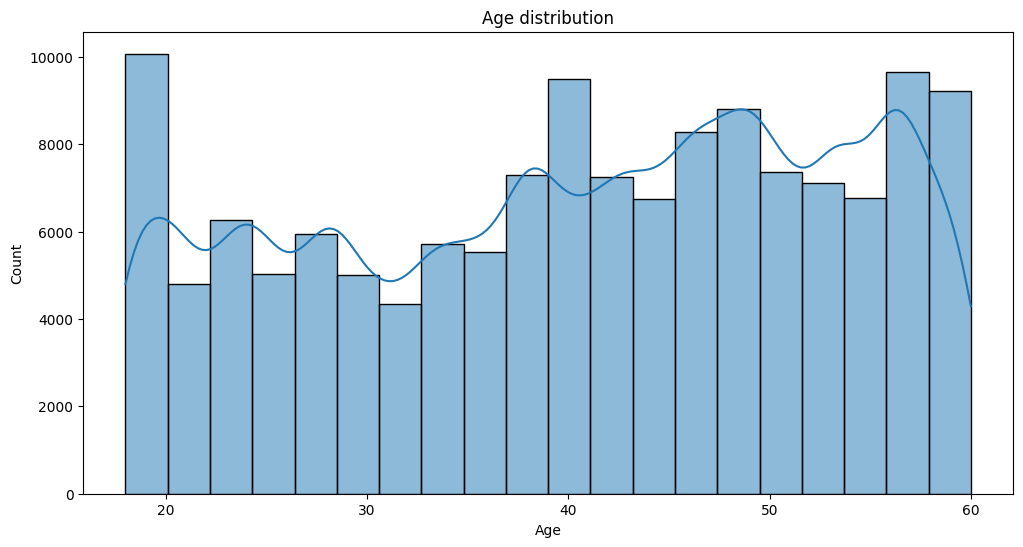

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df_train['Age'], bins=20, kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

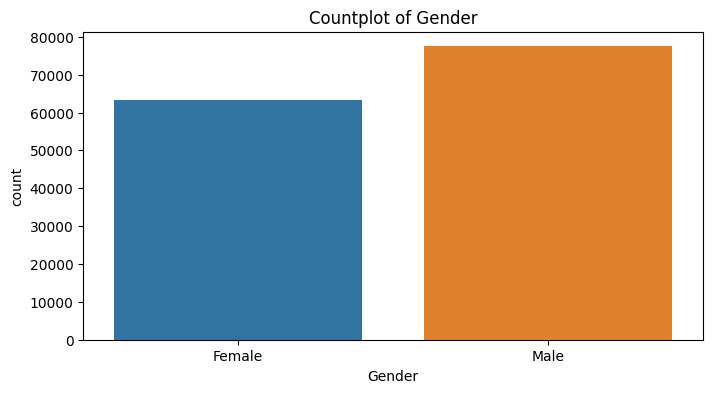

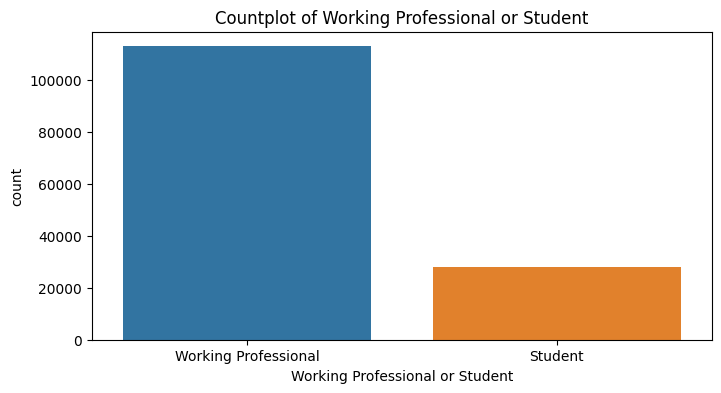

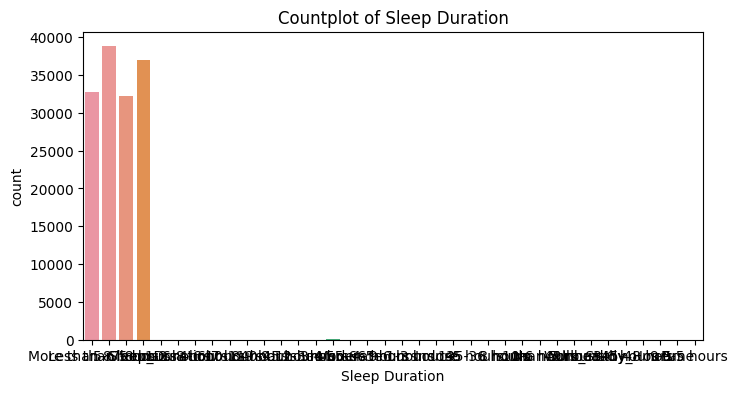

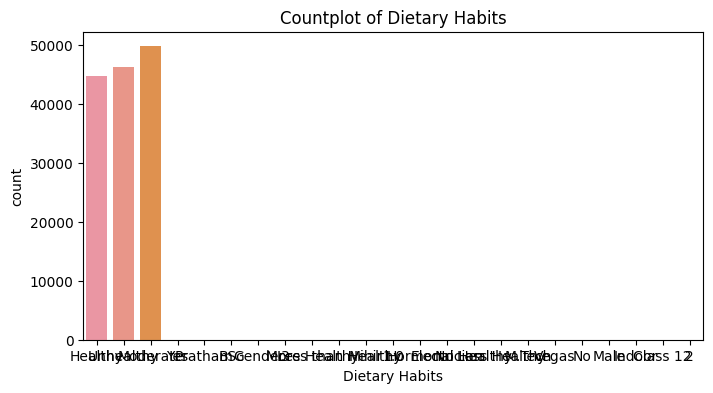

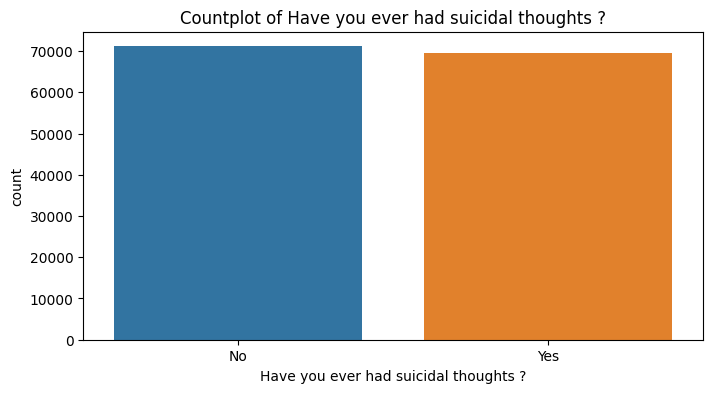

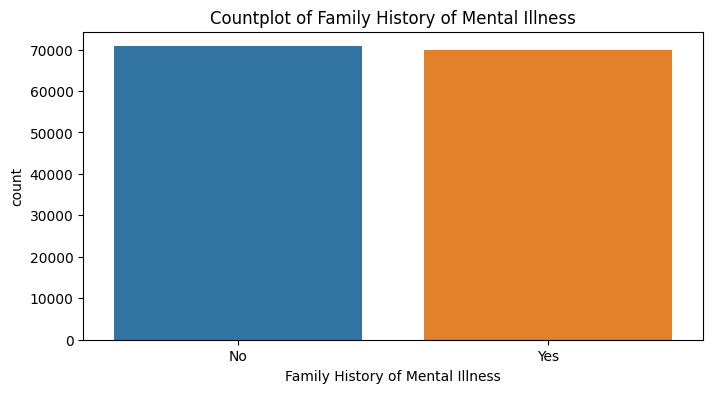

In [12]:
for col in categorical_cols:
    if col == 'Name' or col == 'City' or col == 'Profession' or col == 'City' or col == 'Degree':
        continue
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_train, x=col)
    plt.title(f'Countplot of {col}')
    plt.ylabel('count')
    plt.show()

<Axes: >

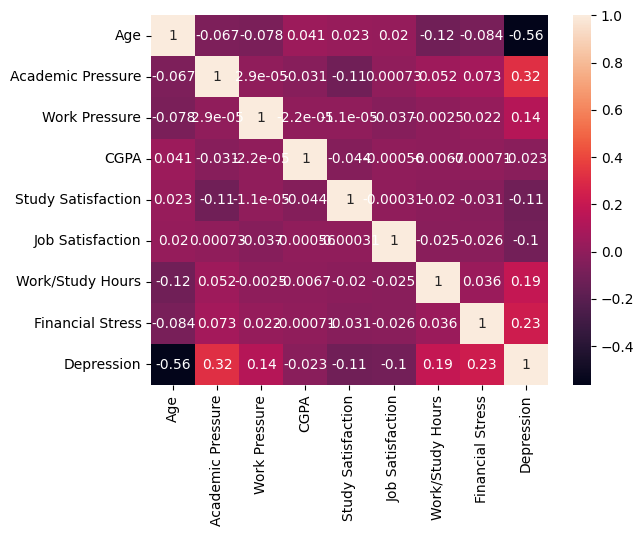

In [18]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True)

In [15]:
df_train.nunique()

Name                                     422
Gender                                     2
Age                                       43
City                                      98
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     331
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [17]:
df_test.nunique()

Name                                     374
Gender                                     2
Age                                       44
City                                      68
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     326
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            31
Dietary Habits                            22
Degree                                    87
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
dtype: int64

In [23]:
df_train

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,3.0,5.0,7.77,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,7.77,3.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,7.77,3.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,7.77,3.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,Teacher,3.0,5.0,7.77,3.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,3.0,5.0,7.77,3.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,3.0,3.0,7.77,3.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,3.0,5.0,7.77,3.0,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [38]:
from category_encoders import BinaryEncoder
high_card_cols = ['City', 'Profession', 'Degree', 'Dietary Habits']
binary_cols = ['Gender', 'Working Professional or Student', 
               'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Binary Encoding for high-cardinality columns
encoder = BinaryEncoder(cols=high_card_cols)

# Transform both train and test datasets using the fitted encoder
df_train_high_card = encoder.fit_transform(df_train[high_card_cols])
df_test_high_card = encoder.transform(df_test[high_card_cols])

from sklearn.preprocessing import LabelEncoder
#for small cardianalities
df_train_binary = df_train[binary_cols].copy()
df_test_binary = df_test[binary_cols].copy()
for col in binary_cols:
    le = LabelEncoder()
    df_train_binary[col] = le.fit_transform(df_train[col].astype(str))
    df_test_binary[col] = le.transform(df_test[col].astype(str))
df_train_encoded = pd.concat([df_train_high_card, df_train_binary, df_train[numerical_cols]], axis=1)
df_test_encoded = pd.concat([df_test_high_card, df_test_binary, df_test[numerical_cols]], axis=1)

In [39]:
X = df_train_encoded
y = df_train['Depression']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Classification Report:", classification_report(y_test, pred))

Accuracy: 0.9350746268656717
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.97      0.96     22986
           1       0.85      0.79      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.93      0.94      0.93     28140



In [46]:
prediction = rf_model.predict(df_test_encoded)

In [47]:
sub = pd.DataFrame({
    'id': test_id,
    'Depression': prediction
})
sub.to_csv('submission.csv', index=False)
sub

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1
